In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
BikeRentalData=pd.read_csv('BikeRentalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BikeRentalData.shape)

# Removing duplicate rows if any
BikeRentalData=BikeRentalData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BikeRentalData.head(10)

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,2,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,7,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,6,14


## Data description
The business meaning of each column in the data is as below

##season: The current season (1:winter, 2:spring, 3:summer, 4:fall)
##yr: year (0: 2011, 1:2012)
##mnth: month ( 1 to 12)
##hr: hour of the day (0 to 23)
##holiday: weather day is holiday or not
##weekday: day of the week
##workingday: if day is neither weekend nor holiday is 1, otherwise is 0
##weathersit: The Weather forecast for the day
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
##temp: Normalized temperature in Celsius.
##atemp: Normalized feeling temperature in Celsius.
##hum: Normalized humidity. The values are divided to 100 (max)
##windspeed: Normalized wind speed. The values are divided to 67 (max)
##casual: count of casual users
##registered: count of registered users
##cnt: count of total rental bikes including both casual and registered

## Create a ML model which can predict the number of bikes which will be rented at a given hour of the day
Target Variable: cnt
Predictors: holiday, weather, registered users etc.

In [3]:
# Looking at sample rows in the data
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [4]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [5]:
# Looking at the descriptive statistics of the data
BikeRentalData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [6]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

In [7]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['yr']
BikeRentalData = BikeRentalData.drop(UselessColumns,axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [8]:
# Finding how many missing values are there for each column
BikeRentalData.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F91307BE0>,
      dtype=object)

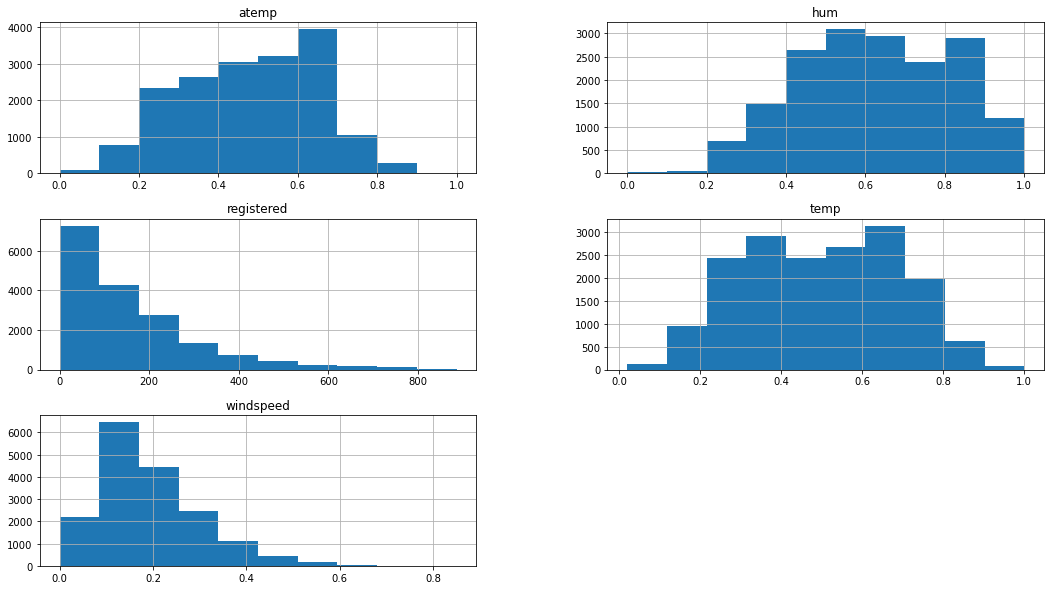

In [9]:
# Plotting histograms of multiple columns together
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

In [10]:
SelectedColumns=['registered','season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Selecting final columns
DataForML=BikeRentalData[SelectedColumns]
DataForML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [11]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['cnt']=BikeRentalData['cnt']

# Printing sample rows
DataForML_Numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


In [13]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values



In [14]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12163, 8)
(12163,)
(5214, 8)
(5214,)


In [16]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

RandomForestRegressor(max_depth=10)


In [17]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
#coeff. of determination,regression score function.
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

R2 Value: 0.9930023808139757


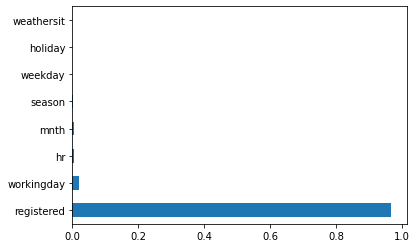

In [18]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [21]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.47351612 88.26462289 90.91865361 91.14629823 88.00888379 84.78390722
 89.67557804 92.55010009 92.06648009 88.69932649]

Final Average Accuracy of the model: 89.36
